<a href="https://colab.research.google.com/github/jmcasanas/jmcasanas/blob/main/BackUp_DWT_LowPass.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
!pip install PyWavelets
!pip install tslearn

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 374.4/374.4 kB 3.2 MB/s eta 0:00:00


In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from scipy.signal import cwt, find_peaks
import pywt

# Leer los datos de la tabla
data = pd.read_csv("/content/drive/MyDrive/analisisCambiosFronterasSbAI/tabla_fronteras_pixelesNumerados_dep390.csv")

In [ ]:
# Crear una lista para almacenar las subtablas procesadas
subtablas_procesadas = []

# Obtener categorías únicas de píxeles
categorias_pixel = data['pixel'].unique()

# Recorrer cada categoría de píxel
for categoria in categorias_pixel:
    # Filtrar los datos para una categoría específica
    subtabla = data[data['pixel'] == categoria]

    # Realizar la transformada wavelet en los valores 'mean' filtrados
    coeffs = pywt.wavedec(subtabla["mean"].values, 'db4', level=5)

    # Eliminar los coeficientes de alta escala (frecuencias altas)
    coeffs[1:] = [np.zeros_like(c) for c in coeffs[1:]]

    # Reconstruir la señal
    filtered_signal = pywt.waverec(coeffs, 'db4')


    if len(filtered_signal) > len(subtabla):
        num_filas_faltantes = len(filtered_signal) - len(subtabla)
        filas_nan = pd.DataFrame({'señal filtrada': [np.nan] * num_filas_faltantes})
        subtabla = pd.concat([subtabla, filas_nan], ignore_index=True)
        subtabla['señal filtrada'] = filtered_signal
    else:
        # Si la subtabla es más larga que filtered_signal, puedes truncarla
        subtabla = subtabla.iloc[:len(filtered_signal)]
        subtabla['señal filtrada'] = filtered_signal


    # Crear una nueva columna "señal filtrada" en la subtabla con los valores filtrados
    #subtabla['señal filtrada'] = filtered_signal

    # Agregar la subtabla procesada a la lista de subtablas procesadas
    subtablas_procesadas.append(subtabla)

# Combinar todas las subtablas procesadas en un nuevo DataFrame
data_procesada = pd.concat(subtablas_procesadas)

data_procesada.tail(20)




<ipython-input-16-4bee8e167b3a>:30: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  subtabla['señal filtrada'] = filtered_signal


,Unnamed: 0,X,DN,mean,x,y,FECHA,pixel,conteo,señal filtrada
384,301810.0,301810.0,18.0,0.024236,-61.579513,-38.672473,2021-12-31,790.0,385.0,0.020602
385,302598.0,302598.0,18.0,0.032364,-61.579513,-38.672473,2022-01-16,790.0,386.0,0.020647
386,303385.0,303385.0,18.0,0.023417,-61.579513,-38.672473,2022-02-01,790.0,387.0,0.020691
387,304175.0,304175.0,18.0,0.023228,-61.579513,-38.672473,2022-02-17,790.0,388.0,0.020731
388,304965.0,304965.0,18.0,0.022919,-61.579513,-38.672473,2022-03-05,790.0,389.0,0.020777
389,305753.0,305753.0,18.0,0.016158,-61.579513,-38.672473,2022-03-21,790.0,390.0,0.020826
390,306544.0,306544.0,18.0,0.015051,-61.579513,-38.672473,2022-04-06,790.0,391.0,0.020864
391,307330.0,307330.0,18.0,0.026378,-61.579513,-38.672473,2022-04-22,790.0,392.0,0.020891
392,308106.0,308106.0,18.0,0.017418,-61.579513,-38.672473,2022-05-08,790.0,393.0,0.020911
393,309618.0,309618.0,18.0,0.019006,-61.579513,-38.672473,2022-05-24,790.0,394.0,0.020922


In [ ]:

# Convierte la columna 'FECHA' a formato de fecha de pandas
data_procesada['FECHA'] = pd.to_datetime(data_procesada['FECHA'], errors='coerce')

# Formatea la fecha en AAAAMMDD y conviértela a entero, manteniendo NaN si existen
data_procesada['fecha'] = data_procesada['FECHA'].dt.strftime('%Y%m%d').astype(float)

# Imprime el DataFrame resultante
data_procesada.tail(20)

,Unnamed: 0,X,DN,mean,x,y,FECHA,pixel,conteo,señal filtrada,fecha
384,301810.0,301810.0,18.0,0.024236,-61.579513,-38.672473,2021-12-31,790.0,385.0,0.020602,20211231.0
385,302598.0,302598.0,18.0,0.032364,-61.579513,-38.672473,2022-01-16,790.0,386.0,0.020647,20220116.0
386,303385.0,303385.0,18.0,0.023417,-61.579513,-38.672473,2022-02-01,790.0,387.0,0.020691,20220201.0
387,304175.0,304175.0,18.0,0.023228,-61.579513,-38.672473,2022-02-17,790.0,388.0,0.020731,20220217.0
388,304965.0,304965.0,18.0,0.022919,-61.579513,-38.672473,2022-03-05,790.0,389.0,0.020777,20220305.0
389,305753.0,305753.0,18.0,0.016158,-61.579513,-38.672473,2022-03-21,790.0,390.0,0.020826,20220321.0
390,306544.0,306544.0,18.0,0.015051,-61.579513,-38.672473,2022-04-06,790.0,391.0,0.020864,20220406.0
391,307330.0,307330.0,18.0,0.026378,-61.579513,-38.672473,2022-04-22,790.0,392.0,0.020891,20220422.0
392,308106.0,308106.0,18.0,0.017418,-61.579513,-38.672473,2022-05-08,790.0,393.0,0.020911,20220508.0
393,309618.0,309618.0,18.0,0.019006,-61.579513,-38.672473,2022-05-24,790.0,394.0,0.020922,20220524.0


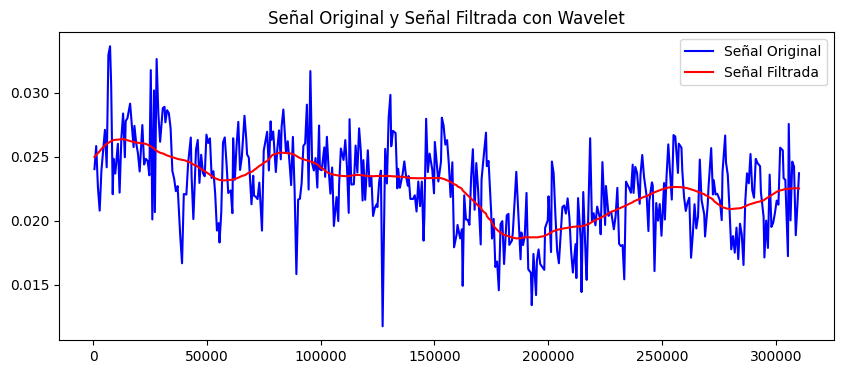

In [ ]:
#chequeando

subset = data_procesada[data_procesada["pixel"] == 605]


# Mostrar la señal original y la señal filtrada en el mismo plot
plt.figure(figsize=(10, 4))
plt.plot(subset["mean"], label='Señal Original', color='b')
plt.plot(subset["señal filtrada"], label='Señal Filtrada', color='r')
plt.legend()
plt.title('Señal Original y Señal Filtrada con Wavelet')
plt.show()


In [ ]:
#clustering
from tslearn.clustering import TimeSeriesKMeans

# Crear una máscara booleana para seleccionar las filas que cumplen con la condición
condicion = (data_procesada["conteo"] > 390) | (data_procesada["conteo"] < 1)

# Usar la máscara booleana para eliminar las filas que cumplen con la condición
data_procesada_390 = data_procesada.drop(data_procesada[condicion].index)


# Agrupar los datos por la columna "pixel" y "conteo" y calcular "mean"
X_train = data_procesada_390.groupby(["pixel", "conteo"])["señal filtrada"].mean().unstack()

# Llenar valores faltantes con ceros si es necesario
X_train = X_train.fillna(data_procesada_390["señal filtrada"].mean())

# Obtener los valores como una matriz numpy
X_train = X_train.to_numpy()


model = TimeSeriesKMeans(n_clusters=4, metric="dtw",
                         max_iter=50, random_state=39) #39
model.fit(X_train)




TimeSeriesKMeans(metric='dtw', n_clusters=4, random_state=39)

In [ ]:
from sklearn.metrics import silhouette_score
from sklearn.metrics import silhouette_samples
#promedio siluetta
labels = model.labels_
silhouette_avg = silhouette_score(X_train, labels)

print("Silhouette Score:", silhouette_avg)

# Calcula el índice de silueta para cada muestra
silhouette_values = silhouette_samples(X_train, labels)

# Crea un diccionario para almacenar los valores de silueta para cada clúster
silhouette_cluster_dict = {cluster: [] for cluster in set(labels)}

# Agrupa los valores de silueta por clúster
for i, label in enumerate(labels):
    silhouette_cluster_dict[label].append(silhouette_values[i])

# Imprime el promedio de los valores de silueta por clúster
for cluster, silhouette_list in silhouette_cluster_dict.items():
    average_silhouette = sum(silhouette_list) / len(silhouette_list) if len(silhouette_list) > 0 else 0
    print(f"Cluster {cluster}: Average Silhouette Score: {average_silhouette}")


Silhouette Score: 0.40175539812180594
Cluster 0: Average Silhouette Score: 0.32920851093755443
Cluster 1: Average Silhouette Score: 0.28857160724900743
Cluster 2: Average Silhouette Score: 0.4470254505452699
Cluster 3: Average Silhouette Score: 0.4492590240888966


In [ ]:
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score, silhouette_samples
import numpy as np
# Supongamos que tienes tu conjunto de datos X_train

# Lista para almacenar los valores de silueta promedio
silhouette_avg_list = []

# Rango de número de clusters que deseas probar
min_clusters = 2
max_clusters = 10  # puedes ajustar esto según tu problema

for n_clusters in range(min_clusters, max_clusters + 1):
    # Crea y entrena el modelo de KMeans con el número actual de clusters
    model = KMeans(n_clusters=n_clusters, random_state=42)
    labels = model.fit_predict(X_train)

    # Calcula la puntuación de silueta promedio
    silhouette_avg = silhouette_score(X_train, labels)
    silhouette_avg_list.append(silhouette_avg)

# Encuentra el número óptimo de clusters basado en la puntuación de silueta
optimal_clusters = np.argmax(silhouette_avg_list) + min_clusters

print(f"Número óptimo de clusters: {optimal_clusters}")


/usr/local/lib/python3.10/dist-packages/tslearn/utils/utils.py:90: UserWarning: 2-Dimensional data passed. Assuming these are 770 1-dimensional timeseries
  warnings.warn(


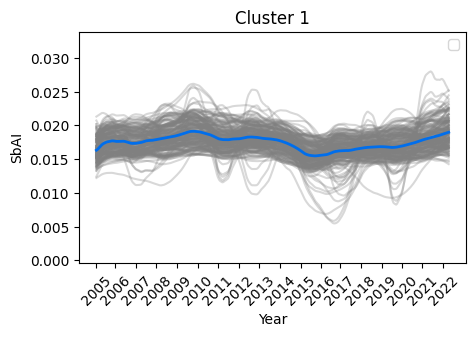

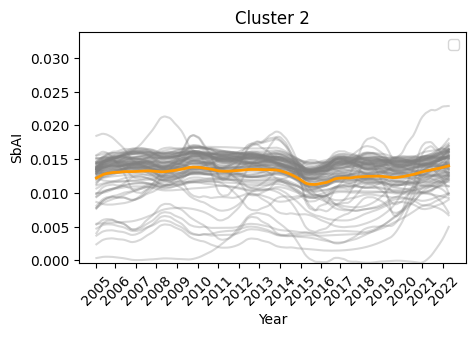

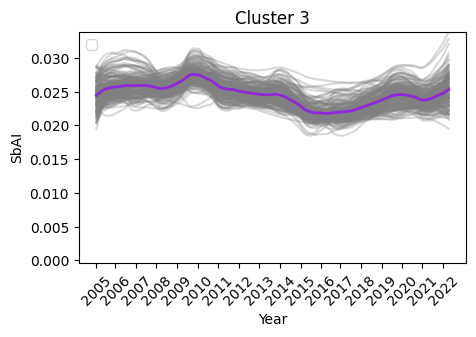

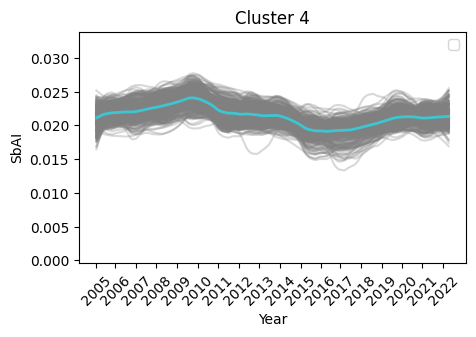

In [ ]:


# Predice las asignaciones de clusters para tus datos
cluster_assignments = model.predict(X_train)

# Obtener los valores únicos de los clusters
unique_clusters = np.unique(cluster_assignments)

# Obtén el rango global de los valores y para todas las series
y_min, y_max = np.min(X_train), np.max(X_train)

# Filtrar las observaciones donde data_procesada["pixel"] es igual a 1, SOLO para usar de label en eje x

filtered_data = data_procesada[data_procesada["pixel"] == 1]

x_mapping = {}
x_values = []
x_labels = []

for i, date in enumerate(filtered_data["fecha"]):
    year = str(date)[:4]
    if year not in x_mapping:
        x_mapping[year] = i
        x_values.append(i)
        x_labels.append(year)

for cluster_label in unique_clusters:
    #plt.figure(figsize=(10, 6)) #ESTE ES EL QUE VA
    plt.figure(figsize=(5, 3)) #ESTE ES MAS CHICO PARA SUMAR AL MAPA

    # Filtrar las series temporales que pertenecen a este cluster
    cluster_series = X_train[cluster_assignments == cluster_label]

    # Calcular la señal promedio del cluster
    mean_series = np.mean(cluster_series, axis=0)

    # Establecer el mismo rango en el eje y para todos los gráficos
    plt.ylim(y_min, y_max)

    # Graficar las series temporales de este cluster en gris de fondo
    for series in cluster_series:
        plt.plot(series, color='gray', alpha=0.3)



     # Graficar la señal promedio en color
    color = {0: '#006eec', 1: '#ff9800', 2: '#8e2adb', 3: '#3dc6d2'}
    plt.plot(mean_series, color=color[cluster_label], linewidth=2)


    plt.xlabel('Year')
    plt.ylabel('SbAI')
    plt.legend()
    plt.xticks(x_values, x_labels, rotation=45)
    plt.title(f'Cluster {cluster_label + 1}')


    # Guardar la imagen
    plt.savefig(f'cluster_{cluster_label}.png', format = 'png', bbox_inches='tight')
    #plt.tight_layout()
    plt.show()


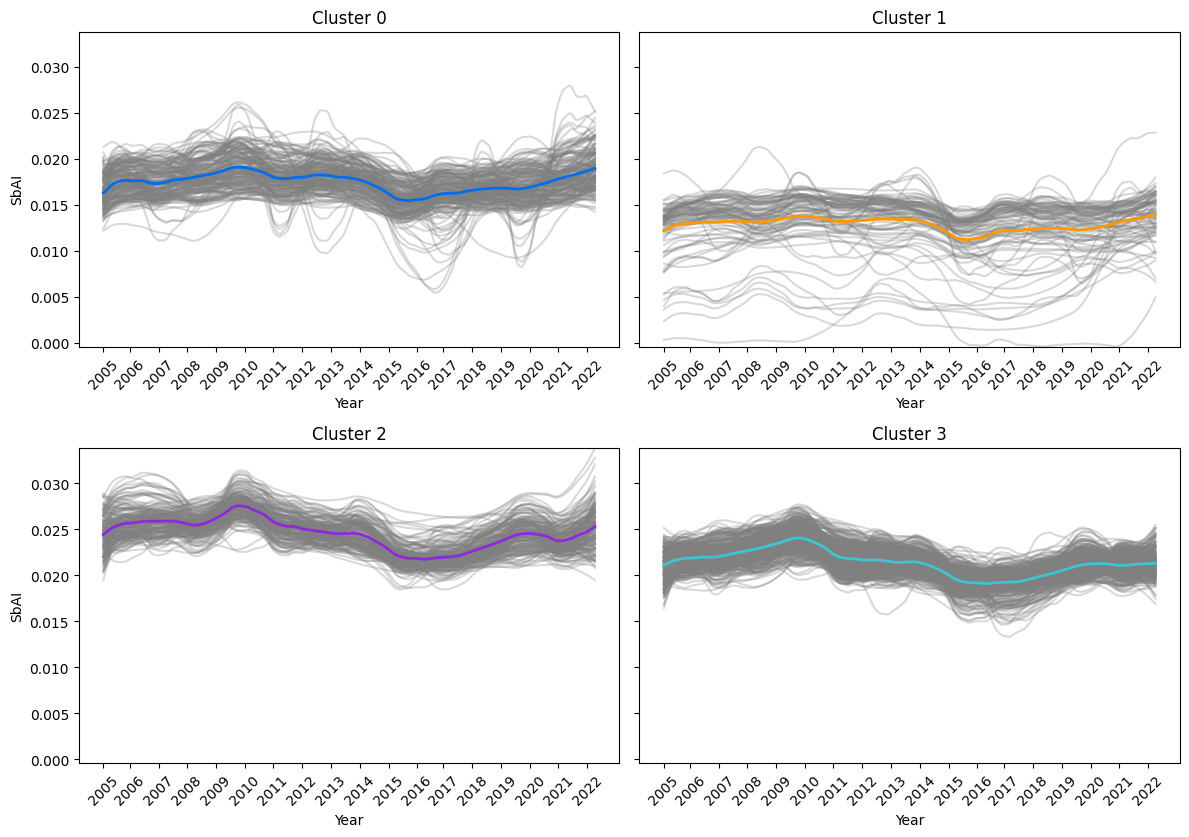

In [ ]:
import matplotlib.pyplot as plt

# Supongamos que tienes un DataFrame llamado data_procesada con una columna "fecha"
# y otra columna "pixel".
# Asegúrate de tener importadas las bibliotecas necesarias.

# Filtrar las observaciones donde data_procesada["pixel"] es igual a 1
filtered_data = data_procesada[data_procesada["pixel"] == 1]

# Crear un mapeo de los primeros 4 dígitos de la columna "fecha" a su primera aparición
x_mapping = {}
x_values = []
x_labels = []

for i, date in enumerate(filtered_data["fecha"]):
    year = str(date)[:4]
    if year not in x_mapping:
        x_mapping[year] = i  # Registrar la ubicación de la primera aparición
        x_values.append(i)
        x_labels.append(year)

# Número de clusters y gráficos por fila
num_clusters = len(unique_clusters)
graphs_per_row = 2

# Calcular el número de filas necesarias
num_rows = (num_clusters + 1) // graphs_per_row
if (num_clusters + 1) % graphs_per_row != 0:
    num_rows += 1

# Crear una figura con la disposición de subgráficos
fig, axes = plt.subplots(num_rows, graphs_per_row, figsize=(12, 12), sharey='row')

# Iterar a través de los clusters y crear los gráficos
for i, cluster_label in enumerate(unique_clusters):
    row = i // graphs_per_row
    col = i % graphs_per_row
    ax = axes[row, col]

    # Filtrar las series temporales que pertenecen a este cluster
    cluster_series = X_train[cluster_assignments == cluster_label]

    # Calcular la señal promedio del cluster
    mean_series = np.mean(cluster_series, axis=0)

    # Establecer el mismo rango en el eje y para todos los gráficos de la misma fila
    if col == 0:
        ax.set_ylim(y_min, y_max)

    # Graficar las series temporales de este cluster en gris de fondo
    for series in cluster_series:
        ax.plot(series, color='gray', alpha=0.3)

    # Graficar la señal promedio en color
    if cluster_label in color:
        ax.plot(mean_series, color=color[cluster_label], linewidth=2)
    else:
        ax.plot(mean_series, color='gray', alpha=0.3)

    # Usar el mapeo para etiquetar el eje x
    ax.set_xticks(x_values)
    ax.set_xticklabels(x_labels, rotation=45)

    # Configurar el label "Valor" solo en la primera columna
    if col == 0:
        ax.set_xlabel('Year')
        ax.set_ylabel('SbAI')
    else:
        ax.set_xlabel('Year')

    #ax.legend()
    ax.set_title(f'Cluster {cluster_label}')

# Eliminar ejes vacíos si no se utilizan
for i in range(num_clusters, num_rows * graphs_per_row):
    row = i // graphs_per_row
    col = i % graphs_per_row
    fig.delaxes(axes[row, col])

# Añadir el séptimo gráfico en la parte inferior del medio
ax = axes[num_rows - 1, graphs_per_row // 2]
ax.set_axis_off()  # Desactivar ejes para el gráfico en blanco
ax.annotate('Séptimo Gráfico', (0.5, 0.5), ha='center', va='center', fontsize=14)



#fig.set_size_inches(12, 25)#sacar esto si es cluster 7

plt.tight_layout()
plt.savefig(f'clusters12en1.png', format = 'png', bbox_inches='tight')

plt.show()

In [ ]:
# Convertir el array en un DataFrame para exportar
df = pd.DataFrame({'Cluster': cluster_assignments})

# Especifica el nombre del archivo CSV
nombre_archivo = 'cluster_assignment_3.csv'

# Exportar el DataFrame a un archivo CSV
df.to_csv(nombre_archivo, index=False)

##HAGO UN CBIND EN R

<ipython-input-20-ea7c38aa34f3>:36: MatplotlibDeprecationWarning: The dist attribute was deprecated in Matplotlib 3.6 and will be removed two minor releases later.
  ax.dist=13


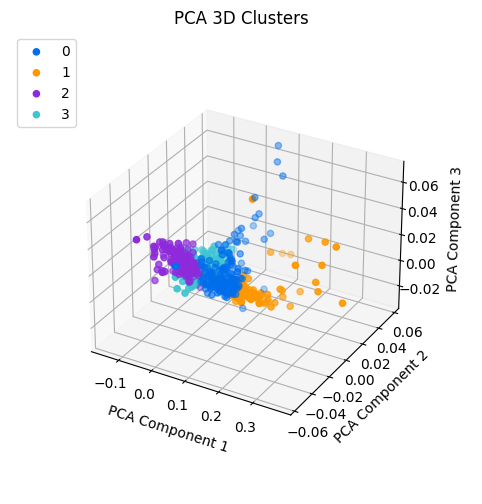

In [ ]:
#PROBANDO PCA

from sklearn.decomposition import PCA
from mpl_toolkits.mplot3d import Axes3D
# Aplicar PCA para reducir la dimensionalidad a 3 componentes principales
# Aplicar PCA para reducir la dimensionalidad a 3 componentes principales
pca = PCA(n_components=3)
X_train_pca = pca.fit_transform(X_train)

# Crear una figura 3D
fig = plt.figure()

ax = fig.add_subplot(111, projection='3d')
#color = {0: '#8e2adb', 1: '#006eec', 2: '#3dc6d2', 3: '#ff1988', 4: '#ff9800'} #para 7
#color = {0: '#8e2adb', 1: '#006eec', 2: '#ff9800', 3: '#3dc6d2'} #para 12
color = {0: '#006eec', 1: '#ff9800', 2: '#8e2adb', 3: '#3dc6d2'} #para 4
# Agrupar clusters con colores compartidos
#cluster_groups = {0: [0, 2, 7, 9], 1: [1, 4, 6, 10], 2: [5], 3: [8], 4: [3, 11]} #para 12
#cluster_groups = {0: [0, 2], 1: [1, 6], 2: [4, 5], 3: [3]} #para 7
cluster_groups = {0: [0], 1: [1], 2: [2], 3: [3]}

# Asignar puntos a los clusters y colores
for group_label, cluster_labels in cluster_groups.items():
    cluster_indices = np.concatenate([np.where(cluster_assignments == cluster_label)[0] for cluster_label in cluster_labels])
    cluster_colors = [color[group_label] for i in range(len(cluster_indices))]
    ax.scatter(X_train_pca[cluster_indices, 0], X_train_pca[cluster_indices, 1], X_train_pca[cluster_indices, 2], c=cluster_colors, label=', '.join(map(str, cluster_labels)))

ax.set_xlabel('PCA Component 1', labelpad=10)
ax.set_ylabel('PCA Component 2', labelpad=10)
ax.set_zlabel('PCA Component 3', labelpad=10)
plt.title('PCA 3D Clusters')

# Modificar leyendas para agrupar colores compartidos
ax.legend(loc='upper left')
fig.set_size_inches(10, 6)
ax.dist=13
plt.savefig(f'3D_7Clusters.png', format='png', bbox_inches='tight')

plt.show()